In [213]:
#Импорт и выбор непрерывного распределения
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import triang
from scipy.stats import norm

c = 0.1
continuous_distribution = triang(c)

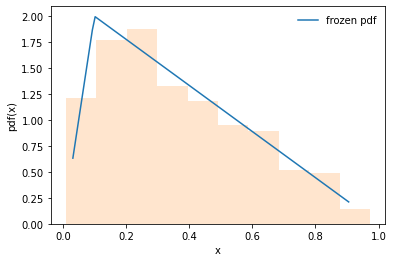

In [214]:
#Сгенирировали выборку, построили график x от pdf(x)
fig, ax = plt.subplots(1, 1)
x = np.linspace(triang.ppf(0.01, c),
                triang.ppf(0.99, c), 100)
ax.plot(x, continuous_distribution.pdf(x), label='frozen pdf')

X = triang.rvs(c, size=1000)
ax.hist(X, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.xlabel("x")
plt.ylabel("pdf(x)")

plt.show()

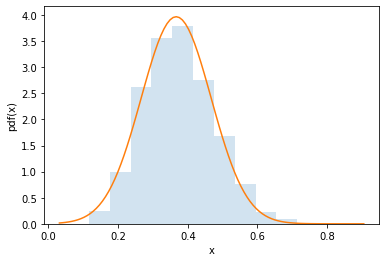

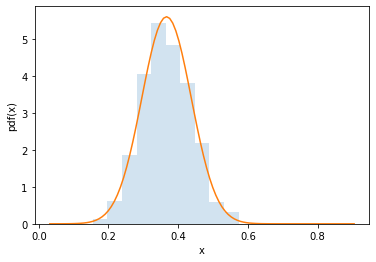

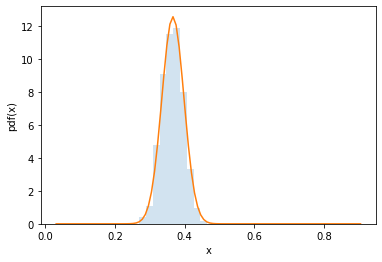

In [216]:
#Генерация выборок, построение графиков, использование цпт
for n in [5, 10, 50]:
    X = np.array([continuous_distribution.rvs(n)])
    for i in range(999):
        X = np.vstack((X,continuous_distribution.rvs(n)))
        
    fig, ax = plt.subplots(1, 1)
    ax.hist([np.mean(x) for x in X], density=True, histtype='stepfilled', alpha=0.2)
    
    mean, var = triang.stats(c, moments='mv')
    ax.plot(x, norm(mean,(var/n) ** 0.5).pdf(x), label='frozen pdf')
    plt.xlabel("x")
    plt.ylabel("pdf(x)")

    
    plt.show()    

Ответ:
-При бОльших n достигается лучшая аппроксимация распределения выборочных средних нормальным